# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Change the name of file with your roll no.



In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 4: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

BayesA) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

BayesB) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

BayesC) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*



In [2]:
# Cell type : CodeWrite

def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

def get_probs_for_A(X_train, Y_train, X_test):
    X1 = X_train[Y_train == 1]
    X2 = X_train[Y_train == -1]

    mu1, mu2 = np.mean(X1, axis=0), np.mean(X2, axis=0)
    N, N1, N2 = len(X_train), len(X1), len(X2)

    p1 = N1 / (N1 + N2)
    p2 = 1 - p1

    W = (mu1 - mu2)[:, None]

    t1 = mu1[None] @ mu1[:, None]
    t2 = mu2[None] @ mu2[:, None]
    b = (1/2) * (-t1 + t2) + np.log(p1 / p2)

    logits = (X_test @ W + b).squeeze()
    return sigmoid(logits)

def function_for_A(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption BayesA.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    logits = get_probs_for_A(X_train, Y_train, X_test)
    Y_test_pred = np.where(logits >= 0.5, 1, -1)
    return Y_test_pred

def get_probs_for_B(X_train, Y_train, X_test):
    X1 = X_train[Y_train == 1]
    X2 = X_train[Y_train == -1]
    
    mu1, mu2 = np.mean(X1, axis=0), np.mean(X2, axis=0)
    N, N1, N2 = len(X_train), len(X1), len(X2)

    S1 = [(x - mu1)[:, None] @ (x - mu1)[None] for x in X1]
    S1 = np.mean(np.stack(S1), axis=0)

    S2 = [(x - mu2)[:, None] @ (x - mu2)[None] for x in X2]
    S2 = np.mean(np.stack(S2), axis=0)

    sigma = (N1 / N) * S1 + (N2 / N) * S2
    sigma_inv = np.linalg.inv(sigma)
    
    p1 = N1 / (N1 + N2)
    p2 = 1 - p1
    
    W = sigma_inv @ (mu1 - mu2)[:, None]
    
    t1 = mu1[None] @ sigma_inv @ mu1[:, None]
    t2 = mu2[None] @ sigma_inv @ mu2[:, None]
    b = (1/2) * (-t1 + t2) + np.log(p1 / p2)

    logits = (X_test @ W + b).squeeze()
    return sigmoid(logits)

def function_for_B(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption BayesB.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    logits = get_probs_for_B(X_train, Y_train, X_test)
    Y_test_pred = np.where(logits >= 0.5, 1, -1)
    return Y_test_pred

def get_probs_for_C(X_train, Y_train, X_test):

    def g_i(Xtrain_i, N):
        N_i = len(Xtrain_i)
        p_i = N_i / N

        mu_i = np.mean(Xtrain_i, axis=0)
        S = [(x - mu_i)[:, None] @ (x - mu_i)[None] for x in Xtrain_i]
        S = np.mean(np.stack(S), axis=0)

        S_inv = np.linalg.inv(S)

        W_i = (-1/2) * S_inv
        w_i = S_inv @ mu_i[:, None]
        wo_i = (-1/2) * (mu_i[None] @ S_inv @ mu_i[:, None]) - (1/2) * np.linalg.norm(S) + np.log(p_i)

        g_i = lambda x: x.T @ W_i @ x + w_i.T @ x + wo_i

        return g_i # x -> (d, 1)

    N = len(X_train)
    X1, X2 = X_train[Y_train == 1], X_train[Y_train == -1]

    g1, g2 = g_i(X1, N), g_i(X2, N)

    l1 = np.array([g1(x[:, None]) for x in X_test])
    l2 = np.array([g2(x[:, None]) for x in X_test])
    l1, l2 = l1.squeeze(), l2.squeeze()

    logits = l1 - l2
    return sigmoid(logits)

def function_for_C(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption BayesC.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

    logits = get_probs_for_C(X_train, Y_train, X_test)

    Y_test_pred = np.where(logits >= 0.5, 1, -1)
    return Y_test_pred

In [3]:
# Cell type : Convenience

# Testing the functions above

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 
# try to remove everything or comment out your lines before submitting.

X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = function_for_A(X_train, Y_train, X_test)
Y_pred_test_1b = function_for_B(X_train, Y_train, X_test)
Y_pred_test_1c = function_for_C(X_train, Y_train, X_test)

print(Y_pred_test_1a[Y_pred_test_1a == 1].shape)
print(Y_pred_test_1b[Y_pred_test_1b == 1].shape)
print(Y_pred_test_1c[Y_pred_test_1c == 1].shape)

# TODO: insights
# prove visually that features are conditionally independent

(983,)
(984,)
(980,)


**Cell type : TextRead**

# Problem 4

#### 4a) Run the above three algorithms (BayesA,B and C), for the two datasets given (datasetA.npz, datasetB.npz) in the cell below.
#### In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 2 as follows: One plot for each dataset, with 3 subplots in each for the three classifiers. Label the 6 plots appropriately.





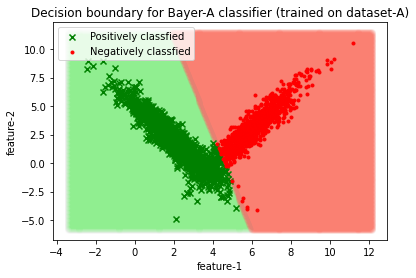

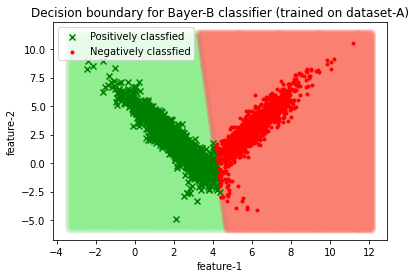

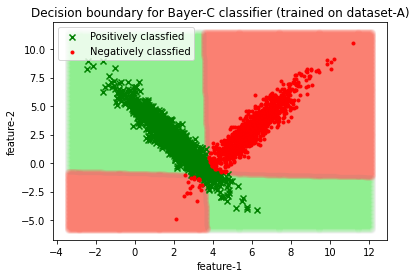

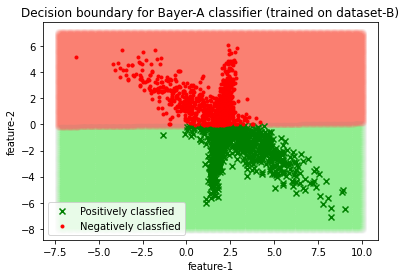

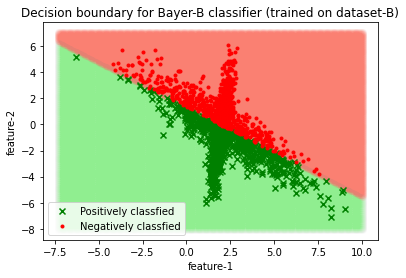

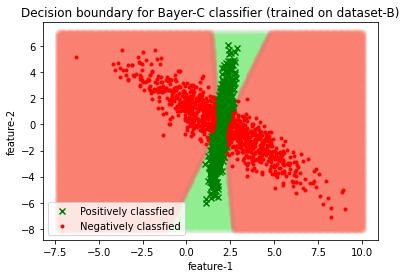

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

def calculate_error(y, y_pred):
    return np.sum(y != y_pred) / len(y)

def load_dataset(data_file):
    with np.load(data_file) as f:
        X_train, Y_train = f["arr_0"], f["arr_1"]
        X_test, Y_test = f["arr_2"], f["arr_3"]

#     print("BayesA:", calculate_error(Y_test, function_for_A(X_train, Y_train, X_test)))
#     print("BayesB:", calculate_error(Y_test, function_for_B(X_train, Y_train, X_test)))
#     print("BayesC:", calculate_error(Y_test, function_for_C(X_train, Y_train, X_test)))

    return X_train, Y_train, X_test, Y_test

def plot_conditional_curve(X, t):
    x1, x2 = X[t == 1, 0], X[t == 1, 1]
    plt.scatter(x1, x2, c="green", marker="x", label="Positively classfied")

    x1, x2 = X[t == -1, 0], X[t == -1, 1]
    plt.scatter(x1, x2, c="red", marker=".", label="Negatively classfied")
    
    plt.xlabel("feature-1")
    plt.ylabel("feature-2")
    plt.legend()

def plot_colors(func, x_limits, y_limits, h=.05):
    x_min, x_max = x_limits
    y_min, y_max = y_limits
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    features = np.stack([xx.flatten(), yy.flatten()]).T
    t = func(features)

    x1, x2 = features[t == 1, 0], features[t == 1, 1]
    plt.scatter(x1, x2, c="lightgreen", marker="o", alpha=0.01)

    x1, x2 = features[t == -1, 0], features[t == -1, 1]
    plt.scatter(x1, x2, c="salmon", marker="o", alpha=0.05)

def plot_contour(X, func, h=.01):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    features = np.stack([xx.flatten(), yy.flatten()]).T
    probs = func(features).reshape(xx.shape)
    contour = plt.contour(xx, yy, probs, colors="blue", levels=1)

def plot_data(dataset, suffix=""):
    X_train, Y_train, X_test, Y_test = dataset
    
    x_limits = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_limits = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    # Bayes-A
    func = lambda features: function_for_A(X_train, Y_train, features)
    plot_colors(func, x_limits, y_limits)
    plot_conditional_curve(X_train, func(X_train))
    plt.title(f"Decision boundary for Bayer-A classifier (trained on {suffix})")
    plt.show()

    # Bayes-B
    func = lambda features: function_for_B(X_train, Y_train, features)
    plot_colors(func, x_limits, y_limits)
    plot_conditional_curve(X_train, func(X_train))
    plt.title(f"Decision boundary for Bayer-B classifier (trained on {suffix})")
    plt.show()

    # Bayes-C
    func = lambda features: function_for_C(X_train, Y_train, features)
    plot_colors(func, x_limits, y_limits)
    plot_conditional_curve(X_train, func(X_train))
    plt.title(f"Decision boundary for Bayer-C classifier (trained on {suffix})")
    plt.show()

# Note: this cell may take 1-2 mins depending on dataset size
datasetA = load_dataset("datasetA.npz")
plot_data(datasetA, suffix="dataset-A")

datasetB = load_dataset("datasetB.npz")
plot_data(datasetB, suffix="dataset-B")

#### 4b) Give the ROC Curves for all the classifiers.



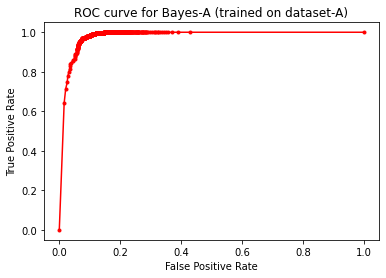

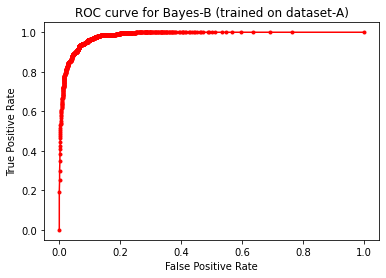

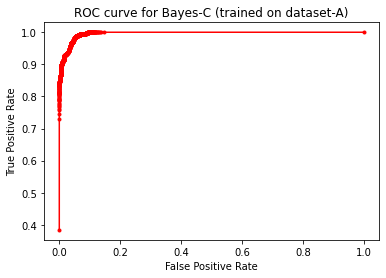

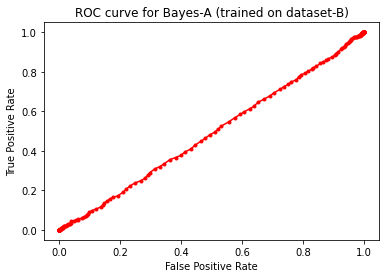

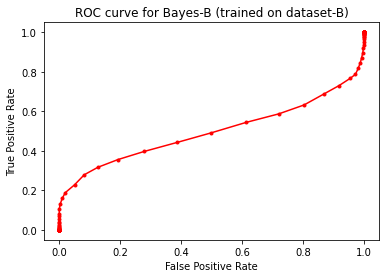

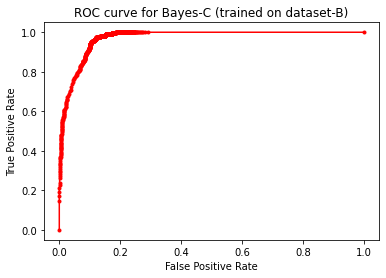

In [5]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

def load_dataset(data_file):
    with np.load(data_file) as f:
        X_train, Y_train = f["arr_0"], f["arr_1"]
        X_test, Y_test = f["arr_2"], f["arr_3"]

    return X_train, Y_train, X_test, Y_test

def calc_roc(labels, probs, threshold):
    predictions = np.where(probs >= threshold, 1, -1)

    tp = np.sum(np.all(np.stack([predictions == 1, labels == 1]), axis=0))
    fp = np.sum(np.all(np.stack([predictions == 1, labels == -1]), axis=0))
    tn = np.sum(np.all(np.stack([predictions == -1, labels == -1]), axis=0))
    fn = np.sum(np.all(np.stack([predictions == -1, labels == 1]), axis=0))
    
    tpr = tp / (tp + fn + 1e-5)
    fpr = fp / (fp + tn + 1e-5)
    return tpr, fpr

def plot_roc(labels, probs, title=None):
    N = 1000
    thresholds = np.arange(0, N + 1) * (1 / N)

    roc = [calc_roc(labels, probs, threshold) for threshold in thresholds]
    tpr, fpr = list(zip(*roc))
    tpr, fpr = list(tpr), list(fpr)

    plt.plot(fpr, tpr, c="red", marker=".")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.show()

def plot_roc_for_data(dataset, suffix=""):
    X_train, Y_train, X_test, Y_test = dataset

    # Bayes-A
    probs_A = get_probs_for_A(X_train, Y_train, X_test)
    plot_roc(Y_test, probs_A, title=f"ROC curve for Bayes-A (trained on {suffix})")

    # Bayes-B
    probs_B = get_probs_for_B(X_train, Y_train, X_test)
    plot_roc(Y_test, probs_B, title=f"ROC curve for Bayes-B (trained on {suffix})")

    # Bayes-C
    probs_C = get_probs_for_C(X_train, Y_train, X_test)
    plot_roc(Y_test, probs_C, title=f"ROC curve for Bayes-C (trained on {suffix})")

datasetA = load_dataset("datasetA.npz")
plot_roc_for_data(datasetA, suffix="dataset-A")

datasetB = load_dataset("datasetB.npz")
plot_roc_for_data(datasetB, suffix="dataset-B")

#### 4c) In the next Textwrite cell, give the error rate of the three classifiers on the three datasets as 3x2 table, with appropriately named rows and columns.



**Cell type : TextWrite**
(Write your observations and table of errors here)

|         | Dataset A | Dataset B |
|---------|-----------|-----------|
| Bayes A | 0.066     | 0.5085    |
| Bayes B | 0.0675    | 0.504     |
| Bayes C | 0.034     | 0.083     |

#### 4d) In the next Textwrite cell, summarise your observations regarding the 6 learnt classifiers.

**Cell type : TextWrite**
(Write your observations and table of errors here)

**Assumptions**

We have assumed that the conditional distribution of data belongs to the gaussian family for all the classifiers.

Additionally,
1. For Bayes-A, we have assumed that features are independent of each other when conditioned over classes.
2. For Bayes-B, we have assumed that conditional distribution of data share the same covariance matrix for all the classes.

**Observations**

The decision boundary for Bayes-A, Bayes-B is linear (as shown in part-a), and hence both models are linear classifiers.

Further, after analysing the error table, we can say that linear models like Bayes-A, Bayes-B perform poorly, especially when two classes cannot be separated using a linear boundary and data does not meet the assumptions we were making before training the model. It is the probable reason we are getting significantly less error value for the Bayes-C model (as shown in the above table) while a more significant value for Bayes-A, Bayes-B.

**Note on non-parametric models**

We can use non-parametric models like the KMeans classifier for solving this problem instead of the Bayes classifier. The significant advantage of using them is that we need not make any assumption on the distribution family. Hence, non-parametric models will work even if data does not belong to some specific distribution.

However, the main limitation of using non-parametric models over parametric models is that we cannot scale them on massive datasets. As the complexity of these models increases as dataset size increases which in contrast remains fixed for the parametric even if dataset size increases.